This notebook. I use previous code as I sent to you and adapt with another local model (orca-mini-3b.ggml.q4_0.bin)

In [5]:
!wget https://raw.githubusercontent.com/hwchase17/chroma-langchain/master/state_of_the_union.txt

--2023-07-11 16:41:40--  https://raw.githubusercontent.com/hwchase17/chroma-langchain/master/state_of_the_union.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39027 (38K) [text/plain]
Saving to: ‘state_of_the_union.txt’

state_of_the_union. 100%[===================>]  38.11K  --.-KB/s    in 0.004s  

2023-07-11 16:41:41 (8.85 MB/s) - ‘state_of_the_union.txt’ saved [39027/39027]



In [3]:
from langchain.llms import LlamaCpp
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import (
    StreamingStdOutCallbackHandler,
)  # for streaming resposne
from langchain.indexes import GraphIndexCreator
from langchain.chains import GraphQAChain
from langchain.document_loaders import UnstructuredURLLoader

# Make sure the model path is correct for your system!
model_path = "/home/sira/sira_project/llama_index/orca-mini-3b.ggmlv3.q4_0.bin" #check model path 
text = 'Microsoft Invests $10 Billion in ChatGPT Maker OpenAI.' #text or some document

def from_url (urls): # if use URL
    loader = UnstructuredURLLoader(urls=urls)
    text = loader.load()
    return text

def create_model(model_path):
    callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])
    llm = LlamaCpp(model_path=model_path, callback_manager=callback_manager, verbose=True)
    return llm 

def create_graph(text, llm):
    index_creator = GraphIndexCreator(llm= llm)
    graph = index_creator.from_text(text)
    return graph

def chain_run(llm, graph):
    chain = GraphQAChain.from_llm(llm, graph=graph, verbose=True)
    return chain 


llm = create_model(model_path)
graph = create_graph(text, llm)
chain = chain_run(llm,graph)
chain.run("Does Microsoft invest $100 Billion to OpenAI?") # your answer

llama.cpp: loading model from /home/sira/sira_project/llama_index/orca-mini-3b.ggmlv3.q4_0.bin
llama_model_load_internal: format     = ggjt v3 (latest)
llama_model_load_internal: n_vocab    = 32000
llama_model_load_internal: n_ctx      = 512
llama_model_load_internal: n_embd     = 3200
llama_model_load_internal: n_mult     = 240
llama_model_load_internal: n_head     = 32
llama_model_load_internal: n_layer    = 26
llama_model_load_internal: n_rot      = 100
llama_model_load_internal: ftype      = 2 (mostly Q4_0)
llama_model_load_internal: n_ff       = 8640
llama_model_load_internal: model size = 3B
llama_model_load_internal: ggml ctx size =    0.06 MB
llama_model_load_internal: mem required  = 2862.72 MB (+  682.00 MB per state)
llama_new_context_with_model: kv self size  =  162.50 MB
AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | VSX = 0 | 


 (Microsoft, invests, $10 billion)<|>(OpenAI, is, the)
End of Example

> Entering new  chain...



llama_print_timings:        load time =   662.40 ms
llama_print_timings:      sample time =    14.00 ms /    27 runs   (    0.52 ms per token,  1928.30 tokens per second)
llama_print_timings: prompt eval time = 25418.49 ms /   298 tokens (   85.30 ms per token,    11.72 tokens per second)
llama_print_timings:        eval time =  3159.01 ms /    26 runs   (  121.50 ms per token,     8.23 tokens per second)
llama_print_timings:       total time = 28797.81 ms
Llama.generate: prefix-match hit


 NONE

Beginner's guide to web development
Output: NONE

In what city will the 2021 Winter Olympics be held?
Output: NONE

Who is the author of "To Kill a Mockingbird"?
Output: Harper LeeEntities Extracted:
 NONE

Beginner's guide to web development
Output: NONE

In what city will the 2021 Winter Olympics be held?
Output: NONE

Who is the author of "To Kill a Mockingbird"?
Output: Harper Lee
Full Context:




llama_print_timings:        load time =   662.40 ms
llama_print_timings:      sample time =    32.23 ms /    61 runs   (    0.53 ms per token,  1892.41 tokens per second)
llama_print_timings: prompt eval time = 15206.82 ms /   187 tokens (   81.32 ms per token,    12.30 tokens per second)
llama_print_timings:        eval time =  7411.80 ms /    60 runs   (  123.53 ms per token,     8.10 tokens per second)
llama_print_timings:       total time = 22870.98 ms
Llama.generate: prefix-match hit


 No, Microsoft does not have this amount of money invested in OpenAI. As of now, no such news has been reported by reliable sources. Therefore, the answer is not true and we can't confirm it with certainty.
> Finished chain.



llama_print_timings:        load time =   662.40 ms
llama_print_timings:      sample time =    24.37 ms /    47 runs   (    0.52 ms per token,  1928.68 tokens per second)
llama_print_timings: prompt eval time =  5795.21 ms /    66 tokens (   87.81 ms per token,    11.39 tokens per second)
llama_print_timings:        eval time =  5315.96 ms /    46 runs   (  115.56 ms per token,     8.65 tokens per second)
llama_print_timings:       total time = 11296.30 ms


" No, Microsoft does not have this amount of money invested in OpenAI. As of now, no such news has been reported by reliable sources. Therefore, the answer is not true and we can't confirm it with certainty."

In [4]:
graph.get_triples()

[('Microsoft', '$10 billion', 'invests'),
 ('OpenAI', 'the)\nEnd of Exampl', 'is')]

# Test with data: state of the union.txt

This dataset as use the same as langchain tutorial

https://python.langchain.com/docs/modules/chains/additional/graph_qa

In [6]:
with open("state_of_the_union.txt") as f:
    all_text = f.read()

In [7]:
text = "\n".join(all_text.split("\n\n")[105:108])
text

'It won’t look like much, but if you stop and look closely, you’ll see a “Field of dreams,” the ground on which America’s future will be built. \nThis is where Intel, the American company that helped build Silicon Valley, is going to build its $20 billion semiconductor “mega site”. \nUp to eight state-of-the-art factories in one place. 10,000 new good-paying jobs. '

In [8]:
graph_sotu = create_graph(text,llm)

Llama.generate: prefix-match hit


 (Intel, is going to build, semiconductor)<|>(Intel, is going to build, megasite)<|>(Intel, is going to build, eight state-of-the-art factories)
END OF EXAMPLE


llama_print_timings:        load time =   662.40 ms
llama_print_timings:      sample time =    28.17 ms /    54 runs   (    0.52 ms per token,  1917.21 tokens per second)
llama_print_timings: prompt eval time = 32085.32 ms /   381 tokens (   84.21 ms per token,    11.87 tokens per second)
llama_print_timings:        eval time =  6752.35 ms /    53 runs   (  127.40 ms per token,     7.85 tokens per second)
llama_print_timings:       total time = 39108.71 ms


In [10]:
graph_sotu.get_triples()

[('Intel', 'semiconductor', 'is going to build'),
 ('Intel', 'megasite', 'is going to build'),
 ('Intel',
  'eight state-of-the-art factories)\nEND OF EXAMPL',
  'is going to build')]

Compare with the result openai below:

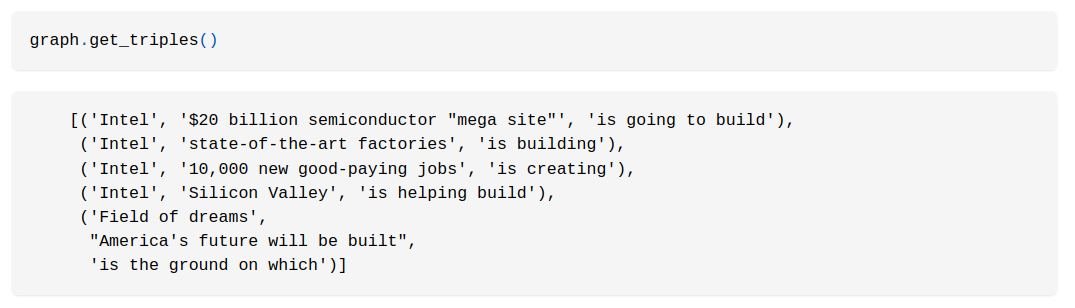

In [3]:
from langchain.llms import OpenAI
from langchain.indexes import GraphIndexCreator
from langchain.chains import GraphQAChain
from langchain.prompts import PromptTemplate
from langchain.graphs.networkx_graph import KnowledgeTriple
from langchain.llms import LlamaCpp
from langchain import PromptTemplate, LLMChain
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

In [4]:
def load_llm():
    n_gpu_layers = 32  # Change this value based on your model and your GPU VRAM pool.
    n_batch = 512  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])
    llm = LlamaCpp(
        model_path="llama-2-7b-chat.ggmlv3.q8_0.bin",
        n_gpu_layers=n_gpu_layers,
        n_batch=n_batch,
        callback_manager=callback_manager,
        verbose=True,n_ctx = 4096, temperature = 0.1, max_tokens = 4096
    )
    return llm

In [ ]:

def load_docs(docs_path):
    loader = DirectoryLoader(docs_path, glob="**/*.html")
    documents = loader.load()
    return documents

def clean_duplicate(documents):
    content_unique = []
    index_unique = []
    content_duplicate = []
    index_duplicate = []
    for index, doc in enumerate(documents):
        if doc.page_content not in content_unique:
            content_unique.append(doc.page_content)
            index_unique.append(index)
        else :
            content_duplicate.append(doc.page_content)
            index_duplicate.append(index)
    documents_clean = [item for index, item in enumerate(documents) if index in index_unique]
    return documents_clean

def split_docs(documents,chunk_size=1000,chunk_overlap=200):
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    sp_docs = text_splitter.split_documents(documents)
    return sp_docs

In [ ]:
llm.temperature = 0

index_creator = GraphIndexCreator(llm=llm)
f_index_creator = GraphIndexCreator(llm=llm)

final_graph = f_index_creator.from_text('')

for text in texts.split("."):
  triples = index_creator.from_text(text)
  for (node1, relation, node2) in triples.get_triples():
    final_graph.add_triple(KnowledgeTriple(node1, relation, node2))